In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/vimalkumar/Downloads/archive (2)/train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
pd.set_option('display.max_columns',500)
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-88,Salaried,26-10-18,6,3705,1,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-88,Self employed,23-10-18,6,3705,1,0,0,1,0,0,825,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-76,Salaried,24-10-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-94,Salaried,29-09-18,4,3479,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [5]:
df = df.drop('Employment.Type',axis=1)
df = df.drop('Date.of.Birth',axis=1)
df = df.drop('DisbursalDate',axis=1)

In [6]:
df.isna().sum().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()

In [8]:
df['PERFORM_CNS.SCORE.DESCRIPTION'] = LB.fit_transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])
df['AVERAGE.ACCT.AGE'] = LB.fit_transform(df['AVERAGE.ACCT.AGE'])
df['CREDIT.HISTORY.LENGTH'] = LB.fit_transform(df['CREDIT.HISTORY.LENGTH'])

In [9]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,6,1998,1,1,0,0,0,0,598,8,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,83,130,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,6,1998,1,1,0,0,0,0,305,11,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,10,133,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,6,1998,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,6,3705,1,0,0,1,0,0,735,3,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,92,215,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,6,3705,1,0,0,1,0,0,825,0,1,0,0,0,0,0,0,0,0,0,0,0,1565,0,0,0,8,8,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,4,3479,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,4,3479,1,1,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,9.570794,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,28.170518,67.549298,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.087599,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,43.575624,93.339611,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,13.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,82.000000,137.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,19.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,191.000000,293.000000,36.000000,1.000000


In [11]:
df.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,NaN,-0.001372,-0.014291,0.008201,-0.026072,-0.001382,-0.014016,0.013145,-0.013584,-0.020862,-0.007915,-0.007259,-0.002910,-0.002563,-0.044180,-0.039888,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,-0.013701,-0.016030,0.016537,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,NaN,-0.015589,0.014490,0.011665,0.001381,0.008291,0.011409,-0.000016,0.034461,0.039542,0.019422,0.015713,0.006294,0.006412,-0.014916,-0.014275,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.004726,0.016032,0.038513,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,NaN,-0.093716,0.048075,0.083899,0.020484,0.005542,-0.047398,0.043540,-0.026798,-0.021692,-0.014782,-0.004356,-0.001180,-0.001221,-0.022600,-0.020359,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.020939,-0.027022,-0.017301,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,NaN,0.106953,-0.037786,-0.098393,-0.024060,0.004467,0.084993,-0.062136,0.086571,0.087929,0.051770,0.026714,0.009955,0.010177,0.013019,0.010565,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.038451,0.063207,0.085725,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,NaN,-0.036384,0.030206,0.021387,-0.015503,-0.008537,-0.018049,0.018425,-0.010384,-0.006403,-0.005546,-0.004133,-0.003370,-0.003412,-0.003194,-0.001957,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,0.001733,-0.002816,-0.001813,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,NaN,-0.081161,0.036804,0.079355,-0.015682,-0.008773,-0.077029,0.064068,-0.070536,-0.066930,-0.042692,-0.022582,-0.012959,-0.012950,-0.025809,-0.019885,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.042848,-0.058255,-0.030988,0.027357
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,NaN,0.041251,-0.029272,-0.046489,0.004777,0.016338,0.073012,-0.062156,0.068371,0.065589,0.025992,0.031722,0.017242,0.017080,0.008392,0.005898,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.049990,0.062859,0.010012,-0.025039
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,NaN,-0.309285,0.041118,0.281934,0.039667,-0.008913,-0.161664,0.136464,-0.084687,-0.117882,-0.062177,-0.055948,-0.025843,-0.025697,-0.051766,-0.049852,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.078243,-0.096506,-0.058821,0.028419
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,NaN,-0.169882,0.113939,0.151839,0.027886,-0.000915,-0.042323,0.041392,-0.008704,-0.021061,-0.012381,-0.006359,-0.004304,-0.004129,0.031245,0.032142,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.010941,-0.011280,-0.016129,0.048075
Employee_code_ID,0.075983,0.010120,0.008711,0.004

<AxesSubplot:>

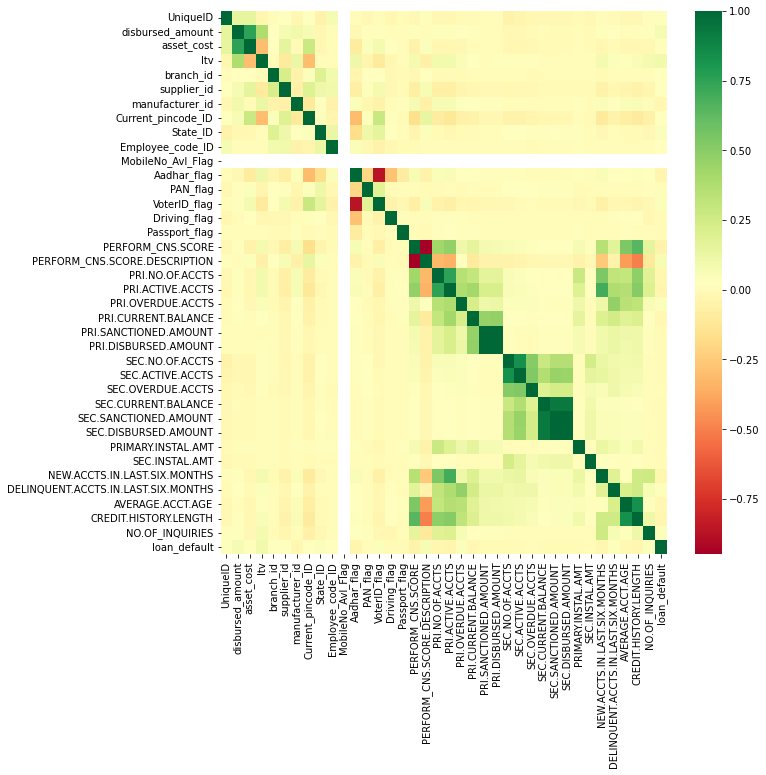

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='RdYlGn')

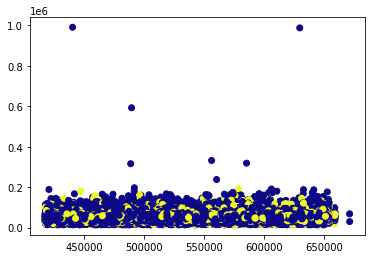

In [13]:
plt.scatter('UniqueID','disbursed_amount',c='loan_default',data=df,cmap='plasma')

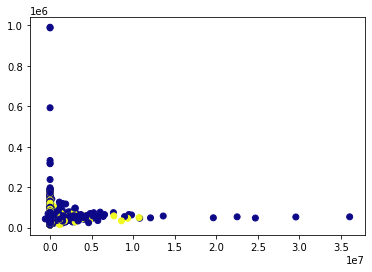

In [14]:
plt.scatter('SEC.CURRENT.BALANCE','disbursed_amount',c=df['loan_default'],data=df,cmap='plasma')

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scale = StandardScaler()

In [17]:
scale_df = scale.fit_transform(df)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [28]:
x_pca = pca.fit_transform(scale_df)
x_pca

array([[-1.37508732,  0.34082694, -1.27249007],
       [ 1.42554091, -0.46914524, -0.52583742],
       [-1.38050119,  0.33728695, -1.18844581],
       ...,
       [-1.65805831,  0.34124205, -0.58488261],
       [-1.64025072,  0.35732967, -0.60532683],
       [-1.60564685,  0.22747628,  0.36321067]])

In [29]:
scale_df.shape

(233154, 38)

In [30]:
x_pca.shape

(233154, 3)

Text(0, 0.5, 'Second Principal Component')

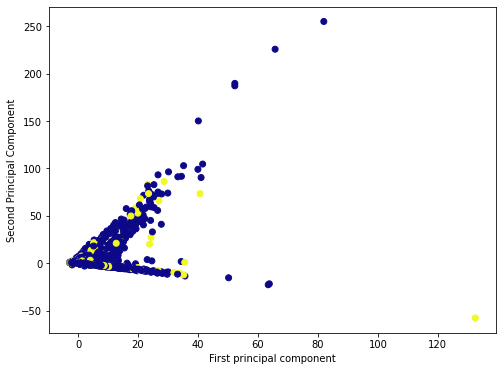

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['loan_default'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Third Principal Component')

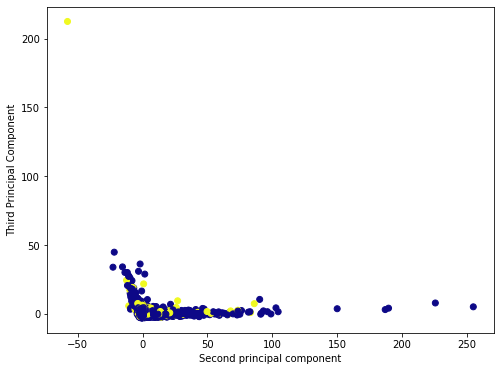

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,1],x_pca[:,2],c=df['loan_default'],cmap='plasma')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')

In [18]:
from sklearn.decomposition import PCA
pca_1 = PCA()

In [19]:
x_pca1 = pca_1.fit_transform(scale_df)
x_pca1

array([[-1.37508260e+00,  3.40860756e-01, -1.27239247e+00, ...,
         2.85305352e-04, -7.06425468e-05,  1.71383044e-16],
       [ 1.42557536e+00, -4.69186574e-01, -5.24194122e-01, ...,
        -5.98224897e-04, -1.58667195e-04, -1.25941345e-16],
       [-1.38049645e+00,  3.37319677e-01, -1.18839203e+00, ...,
         3.00215879e-04, -5.44092364e-05, -1.05608029e-15],
       ...,
       [-1.65806399e+00,  3.41280997e-01, -5.84994245e-01, ...,
         6.92378159e-04,  1.28414898e-04,  5.97924914e-18],
       [-1.64025285e+00,  3.57346450e-01, -6.05483020e-01, ...,
         8.92817913e-04,  1.47299837e-04,  5.53832907e-18],
       [-1.60565818e+00,  2.27540738e-01,  3.62369324e-01, ...,
         4.39740092e-04,  1.89759833e-04,  4.36034332e-18]])

In [20]:
cov_matrix_1 = np.cov(x_pca1.T)
eig_vals,eig_vec = np.linalg.eig(cov_matrix_1)

In [22]:
exp_variance = pca_1.explained_variance_ratio_
exp_variance

array([1.29024573e-01, 9.66145896e-02, 6.39187058e-02, 5.88673288e-02,
       4.94025422e-02, 4.38455979e-02, 4.14530691e-02, 3.81620522e-02,
       3.71493482e-02, 3.67605797e-02, 2.94357983e-02, 2.79952582e-02,
       2.73196546e-02, 2.66282121e-02, 2.62998165e-02, 2.55528776e-02,
       2.50297343e-02, 2.40821813e-02, 2.33672625e-02, 2.20907799e-02,
       2.12360884e-02, 1.91791529e-02, 1.88119764e-02, 1.68682529e-02,
       1.60839512e-02, 1.47970182e-02, 1.26224570e-02, 9.81359638e-03,
       4.55667412e-03, 4.34914054e-03, 3.43845613e-03, 2.36557293e-03,
       1.72582191e-03, 7.48033447e-04, 3.61981267e-04, 3.30960251e-05,
       8.76817179e-06, 2.54456104e-32])

In [24]:
sum(exp_variance)

1.0

In [35]:
sort = np.sort(exp_variance)
sort = sort[::-1]
sort

array([1.29024573e-01, 9.66145896e-02, 6.39187058e-02, 5.88673288e-02,
       4.94025422e-02, 4.38455979e-02, 4.14530691e-02, 3.81620522e-02,
       3.71493482e-02, 3.67605797e-02, 2.94357983e-02, 2.79952582e-02,
       2.73196546e-02, 2.66282121e-02, 2.62998165e-02, 2.55528776e-02,
       2.50297343e-02, 2.40821813e-02, 2.33672625e-02, 2.20907799e-02,
       2.12360884e-02, 1.91791529e-02, 1.88119764e-02, 1.68682529e-02,
       1.60839512e-02, 1.47970182e-02, 1.26224570e-02, 9.81359638e-03,
       4.55667412e-03, 4.34914054e-03, 3.43845613e-03, 2.36557293e-03,
       1.72582191e-03, 7.48033447e-04, 3.61981267e-04, 3.30960251e-05,
       8.76817179e-06, 2.54456104e-32])

In [37]:
round_array = np.round(sort,decimals=2)
round_array

array([0.13, 0.1 , 0.06, 0.06, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [38]:
sum(round_array)

1.0000000000000004

In [49]:
sum = 0
x = []
for i in round_array:
    sum = i + sum
    x.append(sum)
    if sum >= 0.95:
        break
print('N_Components :' , len(x))

N_Components : 24
